# **Library files**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
! pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


# **Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset Loading**

In [ ]:
path = '/content/drive/MyDrive/Assam_tweets.csv'

In [ ]:
train_df = pd.read_csv(path)

In [ ]:
train_df.head()

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions
0,1.544307e+18,NaN,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj..."
1,1.544307e+18,NaN,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin..."
2,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat..."
3,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi..."
4,1.544307e+18,NaN,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu..."


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sentiments = SentimentIntensityAnalyzer()
train_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in train_df["tweet_text"]]
train_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in train_df["tweet_text"]]
train_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in train_df["tweet_text"]]
train_df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in train_df["tweet_text"]]
train_df.head(25)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound
0,1.544307e+18,NaN,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.00,0.095,0.905,-0.2960
1,1.544307e+18,NaN,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin...",0.00,0.000,1.000,0.0000
2,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.280,0.720,-0.7506
3,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.259,0.741,-0.8271
4,1.544307e+18,NaN,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.00,0.095,0.905,-0.2755
5,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.280,0.720,-0.7506
6,1.544307e+18,NaN,"RT @arunpudur: Assam : Kabul Khan, Mithu Hussa...",2022-07-05 13:07:51+00:00,NaN,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.00,0.252,0.748,-0.7506
7,1.544307e+18,NaN,RT @ByRakeshSimha: Flood jehad\n\nAssam Police...,2022-07-05 13:07:43+00:00,NaN,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.00,0.280,0.720,-0.8126
8,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:07:33+00:00,NaN,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.259,0.741,-0.8271
9,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.280,0.720,-0.7506


In [ ]:
score = train_df["Compound"].values
sentiment = []

for i in score:
    if i > 0.05 :
        sentiment.append('Positive')


    else:
        sentiment.append('Negative')

train_df["Sentiment"] = sentiment
train_df.head(10)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment
0,1.544307e+18,NaN,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.0,0.095,0.905,-0.2960,Negative
1,1.544307e+18,NaN,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin...",0.0,0.000,1.000,0.0000,Negative
2,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative
3,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.259,0.741,-0.8271,Negative
4,1.544307e+18,NaN,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.0,0.095,0.905,-0.2755,Negative
5,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative
6,1.544307e+18,NaN,"RT @arunpudur: Assam : Kabul Khan, Mithu Hussa...",2022-07-05 13:07:51+00:00,NaN,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.0,0.252,0.748,-0.7506,Negative
7,1.544307e+18,NaN,RT @ByRakeshSimha: Flood jehad\n\nAssam Police...,2022-07-05 13:07:43+00:00,NaN,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.0,0.280,0.720,-0.8126,Negative
8,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:07:33+00:00,NaN,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.259,0.741,-0.8271,Negative
9,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative


In [ ]:
train_df['label'] = pd.Series([1.0,0.0])
train_df["label"].loc[train_df["Sentiment"]=="Positive"]=1.0
train_df["label"].loc[train_df["Sentiment"]=="Negative"]=0.0
train_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label
0,1.544307e+18,NaN,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.00,0.095,0.905,-0.2960,Negative,0.0
1,1.544307e+18,NaN,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin...",0.00,0.000,1.000,0.0000,Negative,0.0
2,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.00,0.280,0.720,-0.7506,Negative,0.0
3,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.00,0.259,0.741,-0.8271,Negative,0.0
4,1.544307e+18,NaN,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.00,0.095,0.905,-0.2755,Negative,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.542897e+18,NaN,RT @SimranB42671851: We all raised our voices ...,2022-07-01 15:44:58+00:00,NaN,Vikas Chaurasiya,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0
19996,1.542897e+18,NaN,RT @SimranB42671851: We all raised our voices ...,2022-07-01 15:44:57+00:00,NaN,Palak,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0
19997,1.542897e+18,NaN,RT @SimranB42671851: We all raised our voices ...,2022-07-01 15:44:55+00:00,NaN,YASH GAMING,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0
19998,1.542897e+18,NaN,RT @SimranB42671851: We all raised our voices ...,2022-07-01 15:44:50+00:00,"Jharkhand, India",The Pankaj Yadav,[],"[{'screen_name': 'SimranB42671851', 'name': 'S...",0.06,0.073,0.867,-0.0819,Negative,0.0


In [ ]:
test_df  = pd.read_csv( '/content/drive/MyDrive/Test set of 2022- Assam twitterdata - Copy of 2022- Assam twitterdata.csv',usecols=['tweet_id', 'tweet_text','name'])

In [ ]:
test_df.head()

,tweet_id,tweet_text,name
0,1541458926977581056,rt gurmeetramrahim saddened tragic loss life c...,ConnectFor
1,1541458728603602945,rt gurmeetramrahim saddened tragic loss life c...,IDLE INDIAN
2,1541458682331922433,rt surendr04202886 humanityaimsofmsg dss volun...,International Rivers
3,1541458618582958080,rt surendr04202886 humanityaimsofmsg dss volun...,Aditya R Singh
4,1541458372653748224,rt gurmeetramrahim saddened tragic loss life c...,hifza


In [ ]:
target_train=train_df.label

In [ ]:
target_train.head(15)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: label, dtype: float64

In [ ]:
all_data=train_df

In [ ]:
#.drop(['target'],axis=1)
all_data.head(10)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label
0,1.544307e+18,NaN,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,NaN,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.0,0.095,0.905,-0.2960,Negative,0.0
1,1.544307e+18,NaN,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,NaN,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin...",0.0,0.000,1.000,0.0000,Negative,0.0
2,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative,0.0
3,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.259,0.741,-0.8271,Negative,0.0
4,1.544307e+18,NaN,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,NaN,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.0,0.095,0.905,-0.2755,Negative,0.0
5,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative,0.0
6,1.544307e+18,NaN,"RT @arunpudur: Assam : Kabul Khan, Mithu Hussa...",2022-07-05 13:07:51+00:00,NaN,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.0,0.252,0.748,-0.7506,Negative,0.0
7,1.544307e+18,NaN,RT @ByRakeshSimha: Flood jehad\n\nAssam Police...,2022-07-05 13:07:43+00:00,NaN,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.0,0.280,0.720,-0.8126,Negative,0.0
8,1.544307e+18,NaN,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:07:33+00:00,NaN,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.259,0.741,-0.8271,Negative,0.0
9,1.544307e+18,NaN,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative,0.0


Data Preprocessing

In [ ]:
all_data = all_data.fillna(0)

In [ ]:
all_data.head(10)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label
0,1.544307e+18,0.0,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,0,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.0,0.095,0.905,-0.2960,Negative,0.0
1,1.544307e+18,0.0,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,0,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin...",0.0,0.000,1.000,0.0000,Negative,0.0
2,1.544307e+18,0.0,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative,0.0
3,1.544307e+18,0.0,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.259,0.741,-0.8271,Negative,0.0
4,1.544307e+18,0.0,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,0,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.0,0.095,0.905,-0.2755,Negative,0.0
5,1.544307e+18,0.0,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative,0.0
6,1.544307e+18,0.0,"RT @arunpudur: Assam : Kabul Khan, Mithu Hussa...",2022-07-05 13:07:51+00:00,0,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.0,0.252,0.748,-0.7506,Negative,0.0
7,1.544307e+18,0.0,RT @ByRakeshSimha: Flood jehad\n\nAssam Police...,2022-07-05 13:07:43+00:00,0,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.0,0.280,0.720,-0.8126,Negative,0.0
8,1.544307e+18,0.0,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:07:33+00:00,0,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.259,0.741,-0.8271,Negative,0.0
9,1.544307e+18,0.0,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative,0.0


In [ ]:
all_data = all_data.dropna()

In [ ]:
all_data.head(10)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label
0,1.544307e+18,0.0,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,0,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.0,0.095,0.905,-0.2960,Negative,0.0
1,1.544307e+18,0.0,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,0,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin...",0.0,0.000,1.000,0.0000,Negative,0.0
2,1.544307e+18,0.0,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative,0.0
3,1.544307e+18,0.0,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.259,0.741,-0.8271,Negative,0.0
4,1.544307e+18,0.0,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,0,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.0,0.095,0.905,-0.2755,Negative,0.0
5,1.544307e+18,0.0,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative,0.0
6,1.544307e+18,0.0,"RT @arunpudur: Assam : Kabul Khan, Mithu Hussa...",2022-07-05 13:07:51+00:00,0,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.0,0.252,0.748,-0.7506,Negative,0.0
7,1.544307e+18,0.0,RT @ByRakeshSimha: Flood jehad\n\nAssam Police...,2022-07-05 13:07:43+00:00,0,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.0,0.280,0.720,-0.8126,Negative,0.0
8,1.544307e+18,0.0,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:07:33+00:00,0,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.0,0.259,0.741,-0.8271,Negative,0.0
9,1.544307e+18,0.0,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.0,0.280,0.720,-0.7506,Negative,0.0


In [ ]:
all_data = all_data[all_data['tweet_text'].isnull() == False]
all_data.head(50)

,tweet_id,receiver_id,tweet_text,timestamp,location,name,hashtags,user_mentions,Positive,Negative,Neutral,Compound,Sentiment,label
0,1.544307e+18,0.0,"RT @zuckmetaverse: Kabul Khan, Mithu Hussain L...",2022-07-05 13:08:07+00:00,0,IndicRWFollower 🇮🇳,[],"[{'screen_name': 'zuckmetaverse', 'name': 'Arj...",0.000,0.095,0.905,-0.2960,Negative,0.0
1,1.544307e+18,0.0,RT @the_hindu: President #RamNathKovind called...,2022-07-05 13:08:07+00:00,0,MD Shahjad,"[{'text': 'RamNathKovind', 'indices': [25, 39]}]","[{'screen_name': 'the_hindu', 'name': 'The Hin...",0.000,0.000,1.000,0.0000,Negative,0.0
2,1.544307e+18,0.0,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:08:06+00:00,"Gujarat, India",બ્રિજેશ પટેલ Brijesh Patel,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.000,0.280,0.720,-0.7506,Negative,0.0
3,1.544307e+18,0.0,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:08:02+00:00,"Delhi, India",Apoorv Tyagi,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.000,0.259,0.741,-0.8271,Negative,0.0
4,1.544307e+18,0.0,"RT @ErayCr: So, Assam floods—that claimed 170+...",2022-07-05 13:08:01+00:00,0,anon,[],"[{'screen_name': 'ErayCr', 'name': 'Eray Mridu...",0.000,0.095,0.905,-0.2755,Negative,0.0
5,1.544307e+18,0.0,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:54+00:00,Bharat,Dubious crime,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.000,0.280,0.720,-0.7506,Negative,0.0
6,1.544307e+18,0.0,"RT @arunpudur: Assam : Kabul Khan, Mithu Hussa...",2022-07-05 13:07:51+00:00,0,1-2 Ka 4,[],"[{'screen_name': 'arunpudur', 'name': 'Arun Pu...",0.000,0.252,0.748,-0.7506,Negative,0.0
7,1.544307e+18,0.0,RT @ByRakeshSimha: Flood jehad\n\nAssam Police...,2022-07-05 13:07:43+00:00,0,imshreeyash,[],"[{'screen_name': 'ByRakeshSimha', 'name': 'Rak...",0.000,0.280,0.720,-0.8126,Negative,0.0
8,1.544307e+18,0.0,RT @AbhishBanerj: Why is this not biggest news...,2022-07-05 13:07:33+00:00,0,honeysonujain,[],"[{'screen_name': 'AbhishBanerj', 'name': 'Abhi...",0.000,0.259,0.741,-0.8271,Negative,0.0
9,1.544307e+18,0.0,RT @RatanSharda55: While we are debating #Amra...,2022-07-05 13:07:33+00:00,"Raipur, India",Arjun,"[{'text': 'Amravati', 'indices': [41, 50]}, {'...","[{'screen_name': 'RatanSharda55', 'name': 'Rat...",0.000,0.280,0.720,-0.7506,Negative,0.0


In [ ]:
all_data.dropna(subset =['tweet_text'], how ='all').shape

(20000, 14)

In [ ]:
all_data.groupby ('label').describe()

tweet_id                                                          \
         count          mean           std           min           25%   
label                                                                    
0.0    19285.0  1.544033e+18  3.150767e+14  1.542897e+18  1.543945e+18   
1.0      715.0  1.543738e+18  4.402528e+14  1.542897e+18  1.543341e+18   

                                                receiver_id                \
                50%           75%           max       count          mean   
label                                                                       
0.0    1.544168e+18  1.544221e+18  1.544307e+18     19285.0  3.944742e+15   
1.0    1.543814e+18  1.544191e+18  1.544306e+18       715.0  5.124278e+16   

       ... Neutral        Compound                                      \
       ...     75%    max    count      mean       std     min     25%   
label  ...                                                               
0.0    ...   0.855  1.000  19285.0 -0.580937  0.333938 -0.9493 -0.8271   
1.0    ...   0.887  0.951    715.0  0.439962  0.190970  0.0516  0.3182   

                               
          50%     75%     max  
label                          
0.0   -0.8126 -0.2755  0.0258  
1.0    0.4767  0.5849  0.8360  

[2 rows x 48 columns]

In [ ]:
all_data['label'].value_counts()

0.0    19285
1.0      715
Name: label, dtype: int64

In [ ]:
127/672

0.18898809523809523

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

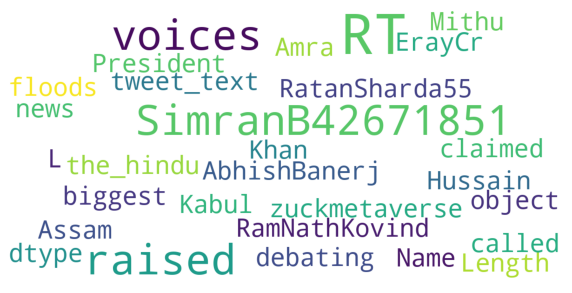

In [ ]:
show_wordcloud(all_data["tweet_text"])

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
all_data["text"]=all_data["tweet_text"].replace(r"[^a-zA-Z0-9]", ' ',regex=True)
# helps to replace alphanumeric data

In [ ]:
all_data["text"]=all_data["text"].replace(r"(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|'(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*')@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])", ' ',regex=True)
# helps to remove mpunctuation in the text tweets


In [ ]:
all_data["text"]=all_data["text"].replace(r"[.+\d. +]", ' ',regex=True)  # helps to replace meta characters

In [ ]:
all_data["text"]=all_data["text"].replace(r"/(?:(?:https?|ftp|file):\/\/|www\.|ftp\.)(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[-A-Z0-9+&@#\/%=~_|$?!:,.])*(?:\([-A-Z0-9+&@#\/%=~_|$?!:,.]*\)|[A-Z0-9+&@#\/%=~_|$])/igm", ' ',regex=True)
# helps to remove url's

In [ ]:
all_data["text"]=all_data["text"].str.lower()
# helps to convert the uppercase into lower case

In [ ]:
all_data["text"] = all_data["text"].apply(lambda x: ' '.join([word for word in str (x).split() if word not in (stop)]))
# helps to stop the words

In [ ]:
all_data["text"].head()

0    rt zuckmetaverse kabul khan mithu hussain lask...
1    rt hindu president ramnathkovind called assam ...
2    rt ratansharda debating amravati udaipur ajmer...
3    rt abhishbanerj biggest news india devastating...
4    rt eraycr assam floods claimed lives natural k...
Name: text, dtype: object

In [ ]:
all_data["text"]=all_data["text"].str.strip()
# helps to remove whitespace

In [ ]:
#Dropping extra columns (Location & ID)
all_data=all_data.drop(['receiver_id',	'tweet_text',	'timestamp',	'hashtags',	'user_mentions','location', 'name','Sentiment','text','Positive','Negative','Neutral','Compound'],axis=1)


In [ ]:
all_data.head()

,tweet_id,label
0,1.544307e+18,0.0
1,1.544307e+18,0.0
2,1.544307e+18,0.0
3,1.544307e+18,0.0
4,1.544307e+18,0.0


In [ ]:
#Dropping rows haiving NAN in any field
all_data=all_data.dropna()

In [ ]:
all_data.head()

,tweet_id,label
0,1.544307e+18,0.0
1,1.544307e+18,0.0
2,1.544307e+18,0.0
3,1.544307e+18,0.0
4,1.544307e+18,0.0
